 # <p> <center> Introduction</center> </p>
 
>  Chronic kidney disease is one of the most common diseases facing humans, as well as one of the most dangerous. This disease is defined as a long-term condition in which the kidneys do not work as they should. It is a common condition often associated with aging. It can infect anyone, but it is more common in most countries such as those in South Asia. We come to the role that we have worked on now. Here in this project, we used data containing features for reasons that indicate chronic kidney disease. We played an important role in this, which is that we used machine learning algorithms to help classify the person with or without this disease. . Where the results we obtained showed that they are wonderful results, and the measurements proved that.

## Loading the librarys

In [1]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

## Loading dataset

In [2]:
df=pd.read_csv('C:/Users/Kalyan/Documents/RiskAssess/datasets/kidney_disease.csv')

In [3]:
# show some of dataset just first columns
df.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba    bgr     bu    sc    sod  pot  hemo pcv     wc   rc  htn   dm  \
0  notpresent  121.0   36.0   1.2    NaN  NaN  15.4  44   7800  5.2  yes  yes   
1  notpresent    NaN   18.0   0.8    NaN  NaN  11.3  38   6000  NaN   no   no   
2  notpresent  423.0   53.0   1.8    NaN  NaN   9.6  31   7500  NaN   no  yes   
3  notpresent  117.0   56.0   3.8  111.0  2.5  11.2  32   6700  3.9  yes   no   
4  notpresent  106.0   26.0   1.4    NaN  NaN  11.6  35   7300  4.6   no   no   
5  notpresent   74.0   25.0   1.1  142.0  3.2  12.2  39   7800  4.4  yes  yes   
6  notpresent  100.0   54.0  24.0  104.0  4.0  12.4  36    NaN  NaN   no   no   
7  notpresent  410.0   31.0   1.1    NaN  NaN  12.4  44   6900    5   no  yes   
8  notpresent  138.0   60.0   1.9    NaN  NaN  10.8  33   9600  4.0  yes  yes   
9  notpresent   70.0  107.0   7.2  114.0  3.7   9.5  29  12100  3.7  yes  yes   

  cad appet   pe  ane classification  
0  no  good   no   no            ckd  
1  no  good   no   no            ckd  
2  no  poor   no  yes            ckd  
3  no  poor  yes  yes            ckd  
4  no  good   no   no            ckd  
5  no  good  yes   no            ckd  
6  no  good   no   no            ckd  
7  no  good  yes   no            ckd  
8  no  good   no  yes            ckd  
9  no  poor   no  yes            ckd

In [4]:
# show shape of dataset
df.shape

(400, 26)

In [5]:
# describe the dataset
df.describe().style.background_gradient(cmap = 'copper')

In [6]:
# show information a bout data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [8]:
# to understand the columns of dataset we can renam the data and set orignal names
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
df.head(10)

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   
5  60.0            90.0             1.015      3.0    0.0             NaN   
6  68.0            70.0             1.010      0.0    0.0             NaN   
7  24.0             NaN             1.015      2.0    4.0          normal   
8  52.0           100.0             1.015      3.0    0.0          normal   
9  53.0            90.0             1.020      2.0    0.0        abnormal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   
5       NaN      notpresent  notpresent                  74.0        25.0   
6    normal      notpresent  notpresent                 100.0        54.0   
7  abnormal      notpresent  notpresent                 410.0        31.0   
8  abnormal         present  notpresent                 138.0        60.0   
9  abnormal         present  notpresent                  70.0       107.0   

   serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume  \
0               1.2     NaN        NaN         15.4                 44   
1               0.8     NaN        NaN         11.3                 38   
2               1.8     NaN        NaN          9.6                 31   
3               3.8   111.0        2.5         11.2                 32   
4               1.4     NaN        NaN         11.6                 35   
5               1.1   142.0        3.2         12.2                 39   
6              24.0   104.0        4.0         12.4                 36   
7               1.1     NaN        NaN         12.4                 44   
8               1.9     NaN        NaN         10.8                 33   
9               7.2   114.0        3.7          9.5                 29   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   
5                   7800                  4.4          yes               yes   
6                    NaN                  NaN           no                no   
7                   6900                    5           no               yes   
8                   9600                  4.0          yes               yes   
9                  12100                  3.7          yes               yes   

  coronary_artery_disease appetite peda_edema aanemia class  
0                      no     good         no      no   ckd  
1                      no     good         no      no   ckd  
2                      no     poor         no     yes   ckd  
3                      no     poor        yes     yes   ckd  
4                      no     good         no      no   ckd  
5                      no     good        yes      no   ckd  
6                      no     good         no      no   ckd  
7                      no     good        yes      no   ckd  
8                      no     good         no     yes 

In [10]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
# we can show the data after made convert for unssesary columns to numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# make a replace for incorect value 

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [13]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [14]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



## Using some of plot to show how the data is ging 

In [15]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



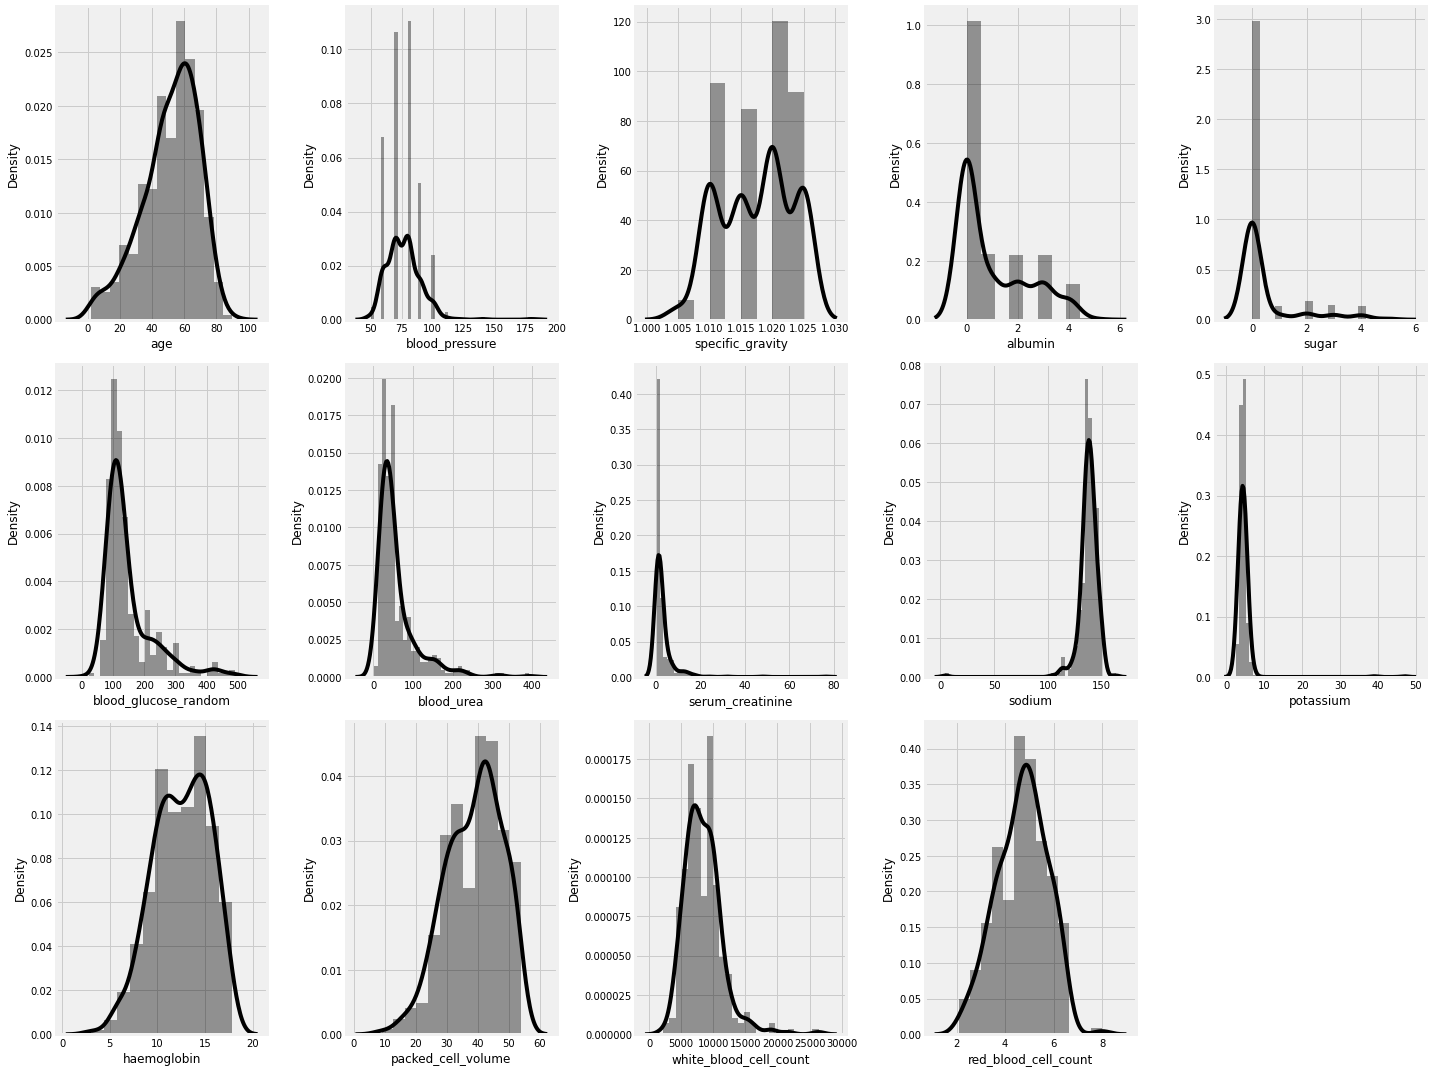

In [17]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### We found Skewness is present in some of the columns.

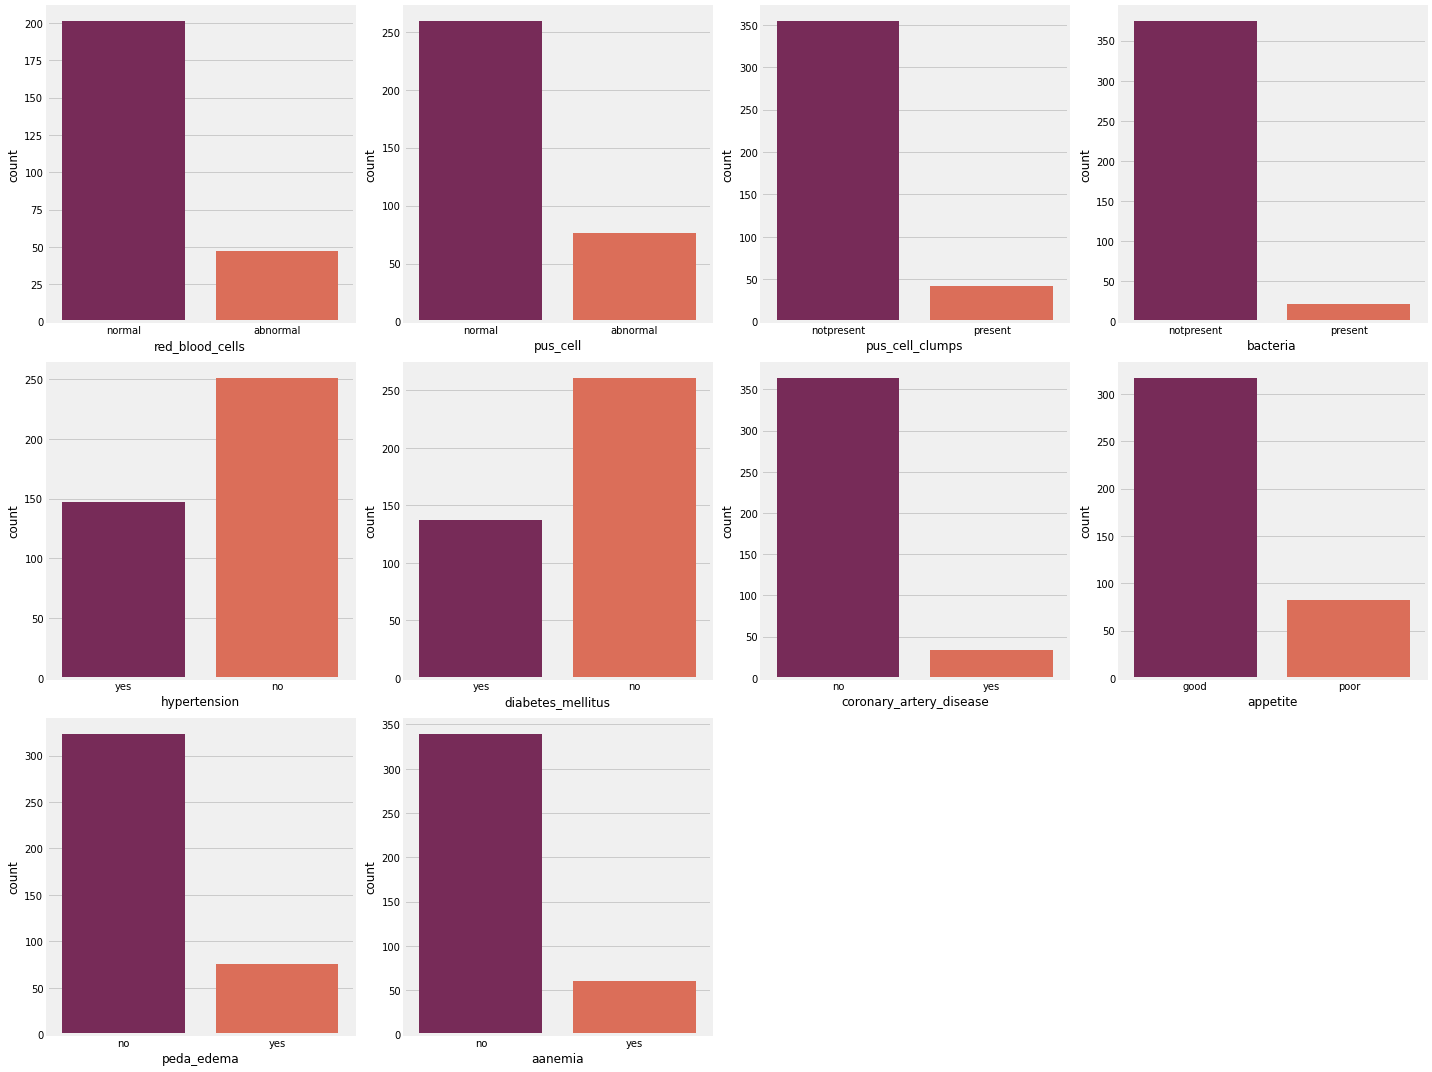

In [18]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket',color='black')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


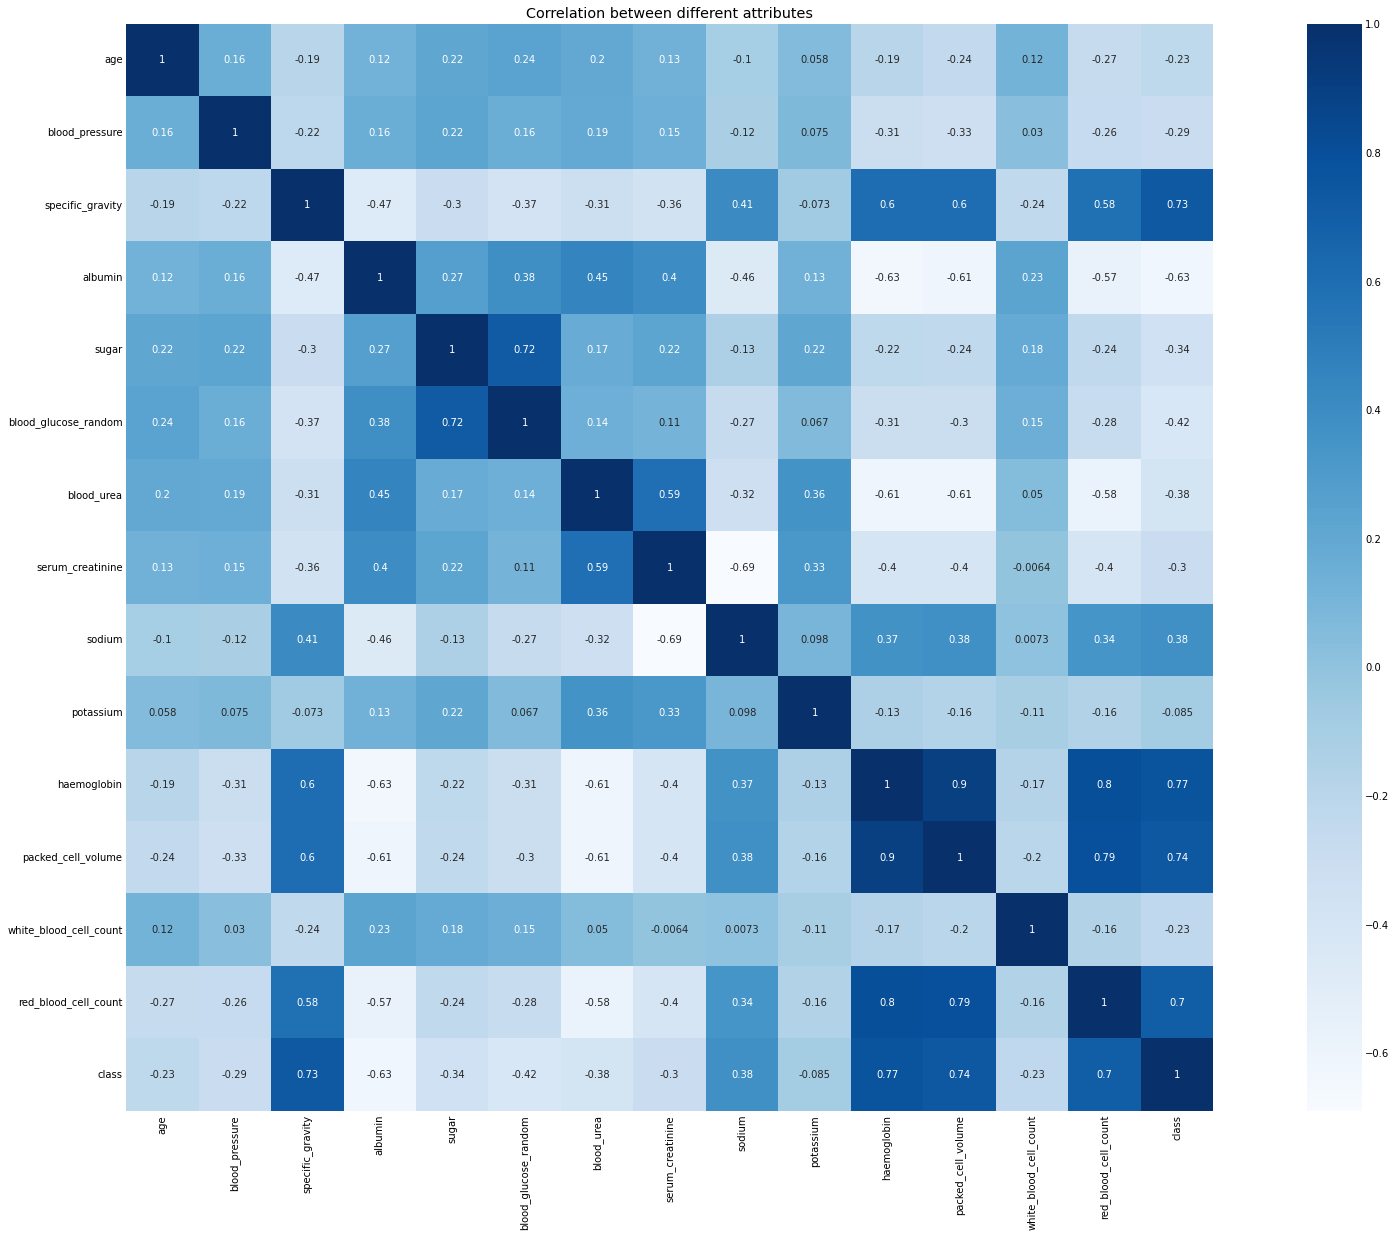

In [19]:
# Calculation the crro
cor=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [20]:
df1 = df[::]
df1.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2     NaN        NaN         15.4                44.0   
1               0.8     NaN        NaN         11.3                38.0   
2               1.8     NaN        NaN          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4     NaN        NaN         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension  \
0                  7800.0                   5.2          yes   
1                  6000.0                   NaN           no   
2                  7500.0                   NaN           no   
3                  6700.0                   3.9          yes   
4                  7300.0                   4.6           no   

  diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia  class  
0               yes                      no     good         no      no      0  
1                no                      no     good         no      no      0  
2               yes                      no     poor         no     yes      0  
3                no                      no     poor        yes     yes      0  
4                no                      no     good         no      no      0

### Here we found different proportions from one column to another

# Exploratory The Data

In [21]:
px.scatter(df, x="age", y="blood_pressure", color="class")

In [22]:
px.scatter(df, x="age", y="sugar", color="class")

In [23]:
px.scatter(df, x="age", y="haemoglobin", color="class", marginal_y="violin", marginal_x="box")

In [24]:
px.scatter(df, x="age", y="bacteria", color="class", marginal_y="violin", marginal_x="box")

In [25]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [26]:
px.violin(df, y="age", x="sugar", color="class", box=True, points="all")


In [27]:
px.scatter_3d(df, x='age', y='hypertension', z='sugar', color='class')

# Make a processing for the data

In [28]:
# checking for null values and correct it

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

#### we have more missing value 
#### Now we can go for correct this issue

In [29]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [30]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

 #### Now we can some of methods to fill missing value like random sampling for higher null values and mean/mode sampling for lower null values

In [31]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [32]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [33]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

### Now all the missing values are full

## Now we can make Feature Encoding 

In [34]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



### Since all of our columns have two classes, we can use the label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [36]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0         1                0         0                 121.0        36.0   
1         1                0         0                 214.0        18.0   
2         1                0         0                 423.0        53.0   
3         0                1         0                 117.0        56.0   
4         1                0         0                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   137.0        3.5         15.4                44.0   
1               0.8   142.0        5.2         11.3                38.0   
2               1.8   142.0        4.9          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        4.6         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                  7800.0                   5.2             1   
1                  6000.0                   2.9             0   
2                  7500.0                   8.0             0   
3                  6700.0                   3.9             1   
4                  7300.0                   4.6             0   

   diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  \
0                  1                        0         0           0        0   
1                  0                        0         0           0        0   
2                  1                        0         1           0        1   
3                  0                        0         1           1        1   
4                  0                        0         0           0        0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

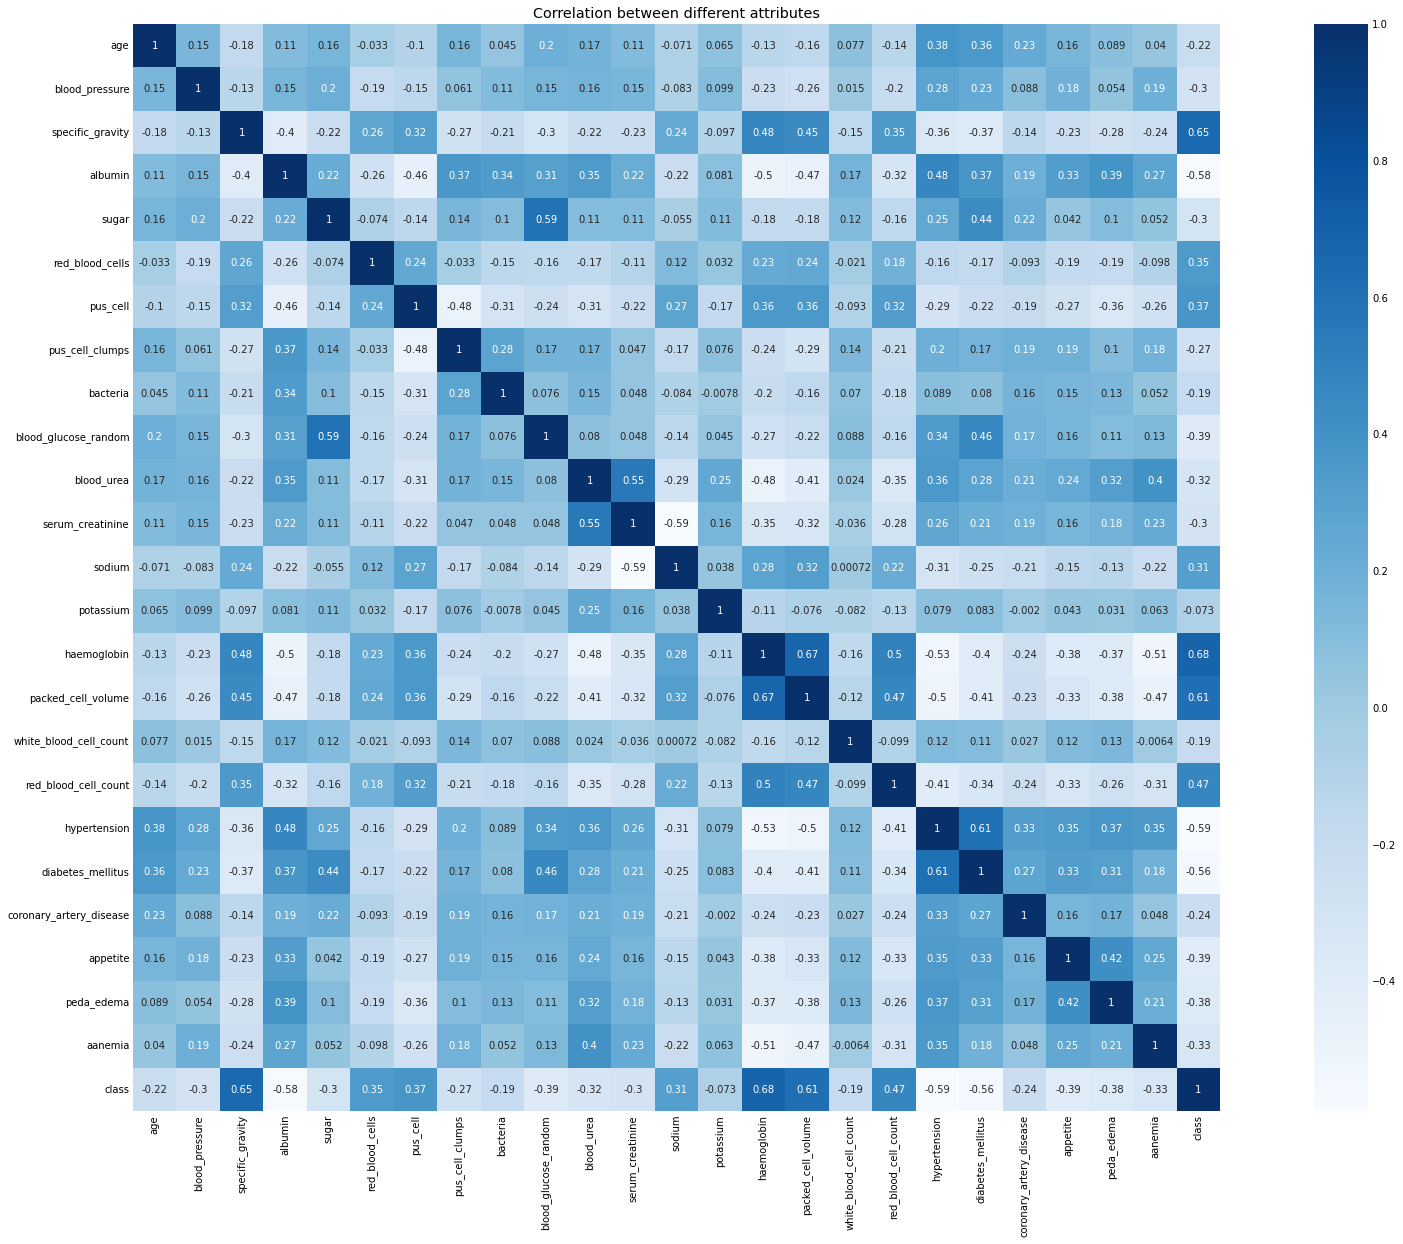

In [37]:
# Calculation the crro
cor=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [38]:
#feature selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df.iloc[:,0:-1], 0.85)
list(corr_features)

[]

In [39]:
df.iloc[:,0:-1]

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                1   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0           1                0         0                 121.0        36.0   
1           1                0         0                 214.0        18.0   
2           1                0         0                 423.0        53.0   
3           0                1         0                 117.0        56.0   
4           1                0         0                 106.0        26.0   
..        ...              ...       ...                   ...         ...   
395         1                0         0                 140.0        49.0   
396         1                0         0                  75.0        31.0   
397         1                0         0                 100.0        26.0   
398         1                0         0                 114.0        50.0   
399         1                0         0                 131.0        18.0   

     serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0                 1.2   137.0        3.5         15.4                44.0   
1                 0.8   142.0        5.2         11.3                38.0   
2                 1.8   142.0        4.9          9.6                31.0   
3                 3.8   111.0        2.5         11.2                32.0   
4                 1.4   138.0        4.6         11.6                35.0   
..                ...     ...        ...          ...                 ...   
395               0.5   150.0        4.9         15.7                47.0   
396               1.2   141.0        3.5         16.5                54.0   
397               0.6   137.0        4.4         15.8                49.0   
398               1.0   135.0        4.9         14.2                51.0   
399               1.1   141.0        3.5         15.8                53.0   

     white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7800.0                   5.2             1   
1                    6000.0                   2.9             0   
2                    7500.0                   8.0             0   
3                    6700.0                   3.9             1   
4                    7300.0                   4.6             0   
..                      ...                   ...           ...   
395                  6700.0                   4.9             0   
396                  7800.0                   6.2             0   
397                  6600.0                   5.4             0   
398                  7200.0                   5.9             0   
399                  6800.0                   6.1             0   

     diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  
0                    1                        0         0           0        0  
1                    0                        0         0           0        0  
2                    1                        0         1           0        1  
3                    0                        0       

# Now we can Using the model of machien Learning 

In [40]:
# data splitting in X,y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [41]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

x = df[['blood_pressure', 'specific_gravity', 'albumin','sugar','red_blood_cell_count', 'pus_cell', 'pus_cell_clumps']]
y = df.iloc[:, -1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [43]:
print("The shape of X_train",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The shape of X_train",y_train.shape)
print("The shape of X_test",y_test.shape)

The shape of X_train (320, 24)
The shape of X_test (80, 24)
The shape of X_train (320,)
The shape of X_test (80,)


# First using RandomForestClassifier


In [44]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [46]:
print('model_RF Train Score is : ' , classifier.score(X_train, y_train))
print('model_RF Test Score is : ' , classifier.score(X_test, y_test))


model_RF Train Score is :  1.0
model_RF Test Score is :  0.9875


In [47]:
print("The Score is: ",accuracy_score(y_test , y_pred)*100)
score_rf = accuracy_score(y_test , y_pred)*100

The Score is:  98.75


In [48]:
#probability of all values
pr1 = classifier.predict_proba(X_test)[0:10,:]
pr1[:2]

array([[0.8, 0.2],
       [0.5, 0.5]])

In [49]:
#probability of zeros
pr2 = classifier.predict_proba(X_test)[0:10,0]
pr2[:2]

array([0.8, 0.5])

In [50]:
#probability of ones
pr3 = classifier.predict_proba(X_test)[0:10,1]
pr3[:2]

array([0.2, 0.5])

In [51]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

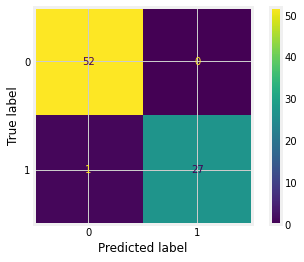

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [53]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred)

In [54]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.0125
The mean_Squre_error 0.0125
The Medain_absolute_error 0.0


# Using Decision Tree Classifier


In [55]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier(random_state=1)
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [57]:
print('model_DT Train Score is : ' , model_dt.score(X_train, y_train))
print('model_DT Test Score is : ' , model_dt.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.975


In [58]:
print('this accuracy ' , accuracy_score(y_test , pred_dt))
score_dt = accuracy_score(y_test , pred_dt)

this accuracy  0.975


In [59]:
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, pred_dt)

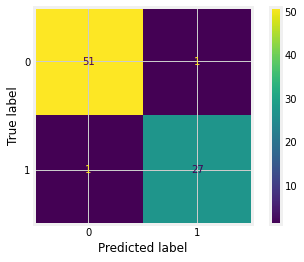

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [61]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, pred_dt)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, pred_dt)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, pred_dt)

In [62]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.025
The mean_Squre_error 0.025
The Medain_absolute_error 0.0


In [63]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix2=confusion_matrix(y_test,pred_dt)
confusion_matrix2

array([[51,  1],
       [ 1, 27]], dtype=int64)

In [64]:
total=sum(sum(confusion_matrix2))

sensitivity = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9807692307692307
Specificity :  0.9642857142857143


In [65]:
total=sum(sum(confusion_matrix2))

ppv = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[0,1])
print('ppv : ', ppv )

npv = confusion_matrix2[1,1]/(confusion_matrix2[1,0]+confusion_matrix2[1,1])
print('npv : ', npv)

ppv :  0.9807692307692307
npv :  0.9642857142857143


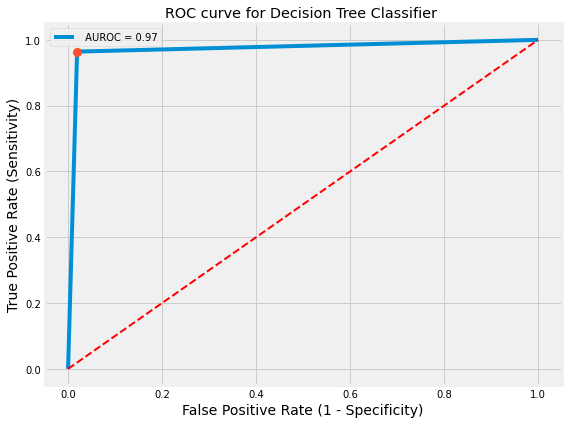

In [66]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_dt)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Using XGBClassifier

In [67]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier(random_state=5)
model_xgb.fit(X_train, y_train)

[16:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
pred_xgb= model_xgb.predict(X_test)

In [69]:
print('model_xgb Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_xgb Test Score is : ' , model_xgb.score(X_test, y_test))

model_xgb Train Score is :  1.0
model_xgb Test Score is :  0.975


In [70]:
score_xgb = accuracy_score(y_test , pred_xgb)
print('this accuracy ' , score_xgb)

this accuracy  0.975


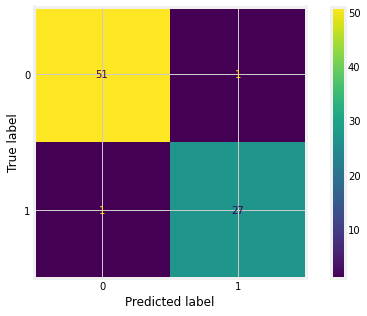

In [71]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_xgb,X_test,y_test);

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,pred_xgb)
confusion_matrix

array([[51,  1],
       [ 1, 27]], dtype=int64)

In [73]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9807692307692307
Specificity :  0.9642857142857143


In [74]:
total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

ppv :  0.9807692307692307
npv :  0.9642857142857143


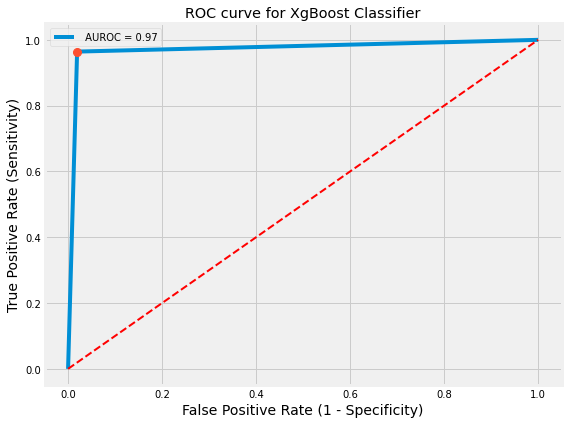

In [75]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XgBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Final output


In [76]:
scores = [score_dt*100,score_rf,score_xgb*100]
algorithms = ["Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision Tree is: 97.5 %
The accuracy score achieved using Random Forest is: 98.75 %
The accuracy score achieved using XGBoost is: 97.5 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

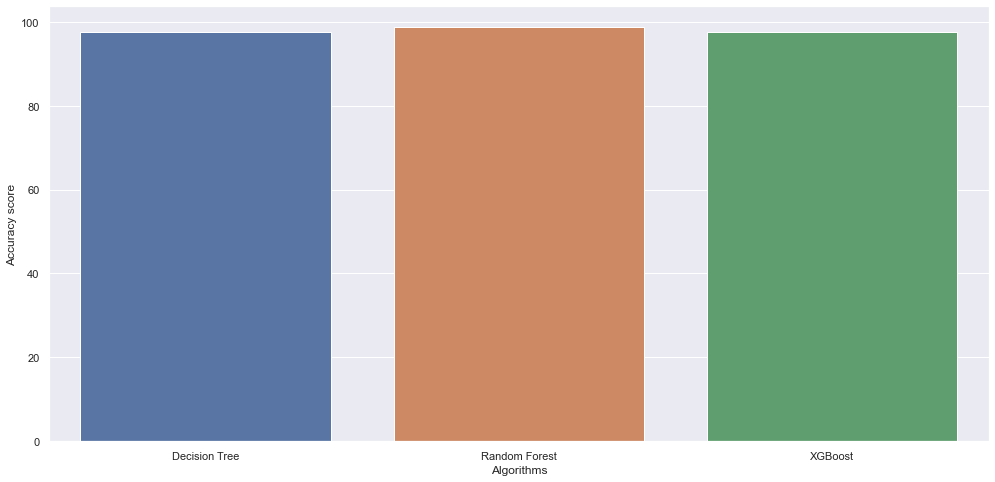

In [77]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [78]:
import pickle
pickle.dump(classifier, open('..\models\ random_kidney.pkl','wb'))#pickling

final_model = pickle.load(open('..\models\ random_kidney.pkl','rb'))# unpickling b